# Final Project -- Wave on a String

In [1]:
import numpy as np
import matplotlib.pyplot as plt

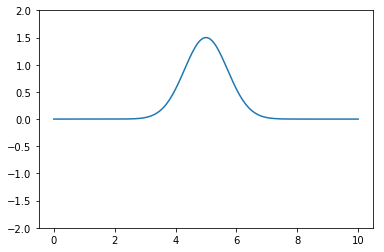

In [2]:
# Discretize Space
L = 10   # length of the string
nx = 201  # discretizing the string into 201 points
x = np.linspace(0, L, nx)
dx = x[1] - x[0]  # values in x are equally spaced, therefore subtracting two adjacent x values gives us dx 

# Setting up Courant-Friedrichs–Lewy Condition, which makes sure the simulation will converge. 
c = 1  # A strictly positive constant that depends on the linear density and tension of the string. Assigned to 1 for convenience.
cfl_cond = 1  #c * (dt/dx) <= 1 for convergence

#Initializing the grid 
U = np.zeros(nx)  # U holds the values of the discretized points in the string at the current time step (t)
U_prev = U    # U_prev holds the values of the discretized points in the string at the previous time step (t - dt)
U_next = U    # U_next holds the values of the discretized points in the string at the next time step (t + dt)

# 3 Different Initial Displacements (Uncomment gauss_, sin_, or cos_ and set U equal to this variable below in order to have different initial displacements)
gauss_ = 1.5*np.exp(-(x-L/2)**2)  #Gaussian Distribution
#sin_ = np.sin(x)    # Standard Sine Curve
#cos_ = np.cos(5*x + np.pi/4)    # Cosine Curve with phase shift and high frequency

U = gauss_ #Change the right side of this equality to gauss_, sin_, or cos_ to have different initial string displacements
U_prev = U

# Plot Initial Conditions
plt.ylim(-2, 2)
plt.plot(x, U)

In [3]:
%matplotlib qt
from matplotlib.animation import FFMpegWriter
metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is coming.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()

with writer.saving(fig, "wave_on_string.mp4", dpi=200):
    
    for iteration in range(400):  #Each iteration represents a new time step. 400 has no significance -- any number of iterations can be used. 
        
        # 4 Different types of Boundary Conditions (Uncomment one of the sets to experience different boundary interactions)
        
        # Fixed Boundary Conditions (Dirichlet)
        U[0] = 0
        U[nx-1] = 0
        
        # Reflecting Boundary Conditions (Neumann)
        #U_next[0] = -U_prev[0] + 2*U[0] + (cfl_cond**2 *(U[1] - 2*U[0] + U[1]))
        #U_next[nx-1] = -U_prev[nx-1] + 2*U[nx-1] + (cfl_cond**2 *(U[nx-2] - 2*U[nx-1] + U[nx-2]))
        
        # Absorbing Boundary Conditions (Mur)
        #U_next[0] = U[1] + ((cfl_cond - 1) / (cfl_cond + 1)) * (U_next[1] - U[0])
        #U_next[nx-1] = U[nx-2] + ((cfl_cond - 1) / (cfl_cond + 1)) * (U_next[nx-2] - U[nx-1])
        
        # Mixed Boundary Conditions (Fixed and Reflecting)
        #U[0] = 0
        #U_next[nx-1] = -U_prev[nx-1] + 2*U[nx-1] + (cfl_cond**2 *(U[nx-2] - 2*U[nx-1] + U[nx-2]))
        
        # Calculating Inner Points of String
        for i in range(1, nx-1):
            U_next[i] = (cfl_cond**2 * (U[i+1] - 2 * U[i] + U[i-1])) + 2 * U[i] - U_prev[i]
            
        # Using Jacobi Method (calculate every point in grid and then copy over) to update values of U_prev and U.
        U_prev = U.copy()  # We need to update U_prev because it is used to calculate inner points of string at new time step.
        U = U_next.copy()
        
        plt.clf()
        plt.plot(x, U, 'ro-', mfc = 'w')
        plt.ylim(-2,2)
        plt.show()
        plt.draw()
        plt.pause(0.05)
        writer.grab_frame()